STEPS TO BE FOLLOWED:
    # import the libraries
    # import the dataset
    # ENCODING CATEGORICAL DATA
    # identify the features and target variable
    # splitting the dataset into the training and test set
    # Training the Multiple Linear Regression model on the training set
    #Predicting the test set results
    #Visualizing the training set results
    #Visualizing the Test set results
    # Performance Evaluation

In [1]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

The dataset that’s considered is the website click per day of the Wikipedia page and topic, the running man ( https://en.wikipedia.org/wiki/Running_Man_(TV_series). In this data, we forecast the number of clicks in the next few days thus understanding pattens of the viewers of the tv series which helps us to understand the impact of various campaigns that are being deployed. 

In [3]:
df = pd.read_csv("task.csv") #time series website clicks of wikipedia page The running man 
df.shape

(184, 14)

In [4]:
df.tail() #data with added trend and seasonal dummies 


,date,clicks,t,log_sales,t_squared,t_cube,t^4,mon,tue,wed,thur,fri,sat,sun
179,27-12-2015,463,180,6.137727,32400,5832000,1049760000,1,0,0,0,0,0,0
180,28-12-2015,448,181,6.104793,32761,5929741,1073283121,0,1,0,0,0,0,0
181,29-12-2015,197,182,5.283204,33124,6028568,1097199376,0,0,1,0,0,0,0
182,30-12-2015,252,183,5.529429,33489,6128487,1121513121,0,0,0,1,0,0,0
183,31-12-2015,126,184,4.836282,33856,6229504,1146228736,0,0,0,0,1,0,0


In [ ]:
pd.set_option('Display.max.columns',50)

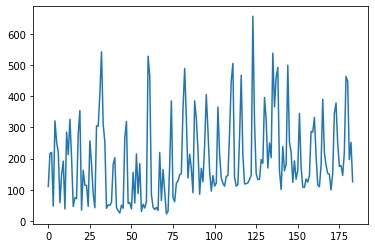

In [ ]:
#plot the data
df.clicks.plot() # we can observe the seasonality here 

In [5]:
#splitting the dataset 
Train = df.head(n=160)
Test = df.tail(n=24)

In [6]:
Train.head()

,date,clicks,t,log_sales,t_squared,t_cube,t^4,mon,tue,wed,thur,fri,sat,sun
0,01-07-2015,111,1,4.709530,1,1,1,0,0,0,1,0,0,0
1,02-07-2015,217,2,5.379897,4,8,16,0,0,0,0,1,0,0
2,03-07-2015,220,3,5.393628,9,27,81,0,0,0,0,0,1,0
3,04-07-2015,48,4,3.871201,16,64,256,0,0,0,0,0,0,1
4,05-07-2015,321,5,5.771441,25,125,625,1,0,0,0,0,0,0


In [7]:

Train.tail()

,date,clicks,t,log_sales,t_squared,t_cube,t^4,mon,tue,wed,thur,fri,sat,sun
155,03-12-2015,135,156,4.905275,24336,3796416,592240896,0,0,0,0,1,0,0
156,04-12-2015,125,157,4.828314,24649,3869893,607573201,0,0,0,0,0,1,0
157,05-12-2015,145,158,4.976734,24964,3944312,623201296,0,0,0,0,0,0,1
158,06-12-2015,287,159,5.659482,25281,4019679,639128961,1,0,0,0,0,0,0
159,07-12-2015,285,160,5.652489,25600,4096000,655360000,0,1,0,0,0,0,0


In [8]:

Test.head()

,date,clicks,t,log_sales,t_squared,t_cube,t^4,mon,tue,wed,thur,fri,sat,sun
160,08-12-2015,332,161,5.805135,25921,4173281,671898241,0,0,1,0,0,0,0
161,09-12-2015,210,162,5.347108,26244,4251528,688747536,0,0,0,1,0,0,0
162,10-12-2015,116,163,4.753590,26569,4330747,705911761,0,0,0,0,1,0,0
163,11-12-2015,110,164,4.700480,26896,4410944,723394816,0,0,0,0,0,1,0
164,12-12-2015,176,165,5.170484,27225,4492125,741200625,0,0,0,0,0,0,1


In [9]:

Test.tail()

# to change the index value in pandas data frame 
# Test.set_index(np.arange(1,13))


,date,clicks,t,log_sales,t_squared,t_cube,t^4,mon,tue,wed,thur,fri,sat,sun
179,27-12-2015,463,180,6.137727,32400,5832000,1049760000,1,0,0,0,0,0,0
180,28-12-2015,448,181,6.104793,32761,5929741,1073283121,0,1,0,0,0,0,0
181,29-12-2015,197,182,5.283204,33124,6028568,1097199376,0,0,1,0,0,0,0
182,30-12-2015,252,183,5.529429,33489,6128487,1121513121,0,0,0,1,0,0,0
183,31-12-2015,126,184,4.836282,33856,6229504,1146228736,0,0,0,0,1,0,0


# Linear

In [11]:
import statsmodels.formula.api as smf 

In [12]:
linear_model = smf.ols('clicks~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['clicks'])-np.array(pred_linear))**2))
rmse_linear


106.49271320867898

#Exponential

In [13]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['clicks'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

104.44051259915662

## Quadratic

In [14]:
 
Quad = smf.ols('clicks~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['clicks'])-np.array(pred_Quad))**2))
rmse_Quad


115.08997188825711

In [15]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 clicks   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     3.996
Date:                Thu, 14 Jan 2021   Prob (F-statistic):             0.0203
Time:                        06:03:15   Log-Likelihood:                -1004.6
No. Observations:                 160   AIC:                             2015.
Df Residuals:                     157   BIC:                             2025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    163.6587     31.284      5.231      0.000     101.868     225.450
t             -0.1691      0.897     -0.188      0.851      -1.941       1.603
t_squared      0.0048      0.005      0.884      0.378      -0.006       0.015
==============================================================================
Omnibus:                       27.134   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.023
Skew:                           1.112   Prob(JB):                     2.48e-08
Kurtosis:                       3.553   Cond. No.                     3.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Additive seasonality


In [18]:
add_sea = smf.ols('clicks~mon+tue+wed+thur+fri+sat',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['mon', 'tue', 'wed', 'thur','fri','sat']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['clicks'])-np.array(pred_add_sea))**2))
rmse_add_sea

76.12296305092924

In [19]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 clicks   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     19.86
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           4.39e-17
Time:                        06:04:02   Log-Likelihood:                -962.53
No. Observations:                 160   AIC:                             1939.
Df Residuals:                     153   BIC:                             1961.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    141.6087     21.147      6.697      0.000      99.832     183.386
mon          223.1739     29.906      7.463      0.000     164.092     282.255
tue          134.4783     29.906      4.497      0.000      75.397     193.560
wed           31.5277     30.244      1.042      0.299     -28.221      91.277
thur         -36.4348     29.906     -1.218      0.225     -95.516      22.647
fri          -12.3913     29.906     -0.414      0.679     -71.473      46.690
sat            5.4783     29.906      0.183      0.855     -53.603      64.560
==============================================================================
Omnibus:                       29.782   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.532
Skew:                           0.977   Prob(JB):                     1.30e-10
Kurtosis:                       4.735   Cond. No.                         7.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Additive seasonality with linear t


In [20]:

add_sea_linear = smf.ols('clicks~mon+tue+wed+thur+fri+sat+t',data=Train).fit()
pred_add_sea_linear = pd.Series(add_sea_linear.predict(Test[['mon', 'tue', 'wed', 'thur','fri','sat','t']]))
rmse_add_sea_linear = np.sqrt(np.mean((np.array(Test['clicks'])-np.array(pred_add_sea_linear))**2))
rmse_add_sea_linear

62.02628359052381

# Additive Seasonality Quadratic 


In [21]:
add_sea_Quad = smf.ols('clicks~t+t_squared+mon+tue+wed+thur+fri+sat',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['mon', 'tue', 'wed', 'thur','fri','sat','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['clicks'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

70.8641010647536

## Multiplicative Seasonality 

In [22]:
Mul_sea = smf.ols('log_sales~mon+tue+wed+thur+fri+sat', data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['clicks'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

92.5771306479447

In [23]:
#tabulating the rmse values

data={'Model':pd.Series(['rmse_linear','rmse_Exp','rmse_Quad','rmse_add_sea','rmse_add_sea_linear','rmse_add_sea_quad','rmse_Mult_sea',]),'Values':pd.Series([rmse_linear, rmse_Exp, rmse_Quad, rmse_add_sea, rmse_add_sea_linear, rmse_add_sea_quad, rmse_Mult_sea,])}
data
Rmse=pd.DataFrame(data)
Rmse


,Model,Values
0,rmse_linear,106.492713
1,rmse_Exp,104.440513
2,rmse_Quad,115.089972
3,rmse_add_sea,76.122963
4,rmse_add_sea_linear,62.026284
5,rmse_add_sea_quad,70.864101
6,rmse_Mult_sea,92.577131


we see additive seasonality with linear trend has the least rmase value 

In [24]:
df_pred = Test

final= smf.ols('clicks~t+mon+tue+wed+thur+fri+sat',data=df).fit()
pred= pd.Series(final.predict(df_pred))
actual_pred = np.exp(pred)
actual_pred

160     5.547122e+94
161     3.530263e+67
162     8.018732e+72
163     1.522461e+79
164     1.854737e+80
165    7.622560e+176
166    1.852402e+140
167     2.173592e+96
168     1.383303e+69
169     3.142072e+74
170     5.965632e+80
171     7.267627e+81
172    2.986835e+178
173    7.258480e+141
174     8.517036e+97
175     5.420356e+70
176     1.231194e+76
177     2.337582e+82
178     2.847758e+83
179    1.170366e+180
180    2.844173e+143
181     3.337328e+99
182     2.123920e+72
183     4.824328e+77
dtype: float64

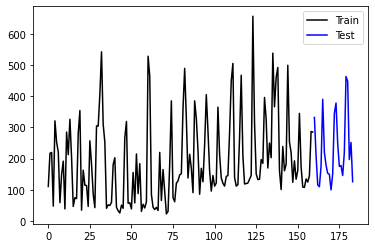

In [25]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["clicks"], label='Train',color="black")
plt.plot(Test.index, Test["clicks"], label='Test',color="blue")
plt.legend(loc='best')

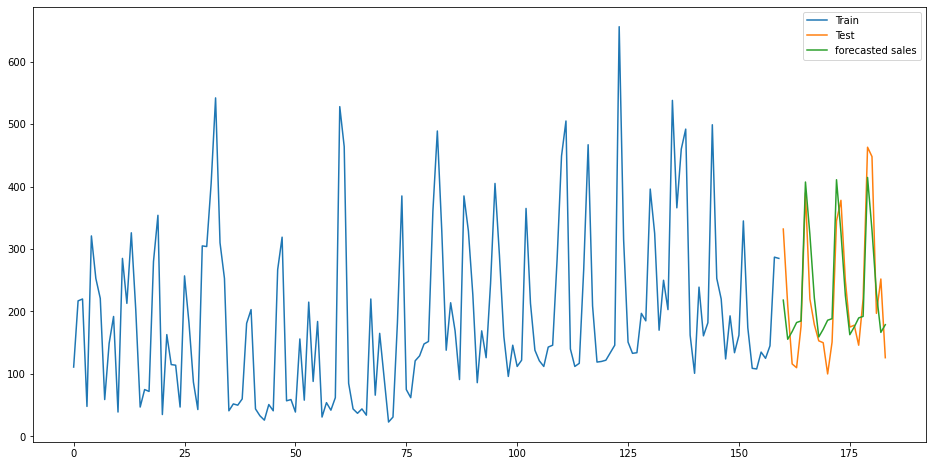

In [26]:
plt.figure(figsize=(16,8))
plt.plot( Train['clicks'], label='Train')
plt.plot(Test['clicks'], label='Test')
plt.plot(pred, label='forecasted sales')
plt.legend(loc='best')

#Arima models 

In [28]:
from datetime import datetime

In [29]:
def parser(x):
    return datetime.strptime(x, '%d-%m-%Y')



In [30]:
dfa =pd.read_csv('task0.csv' ,index_col=0, parse_dates=[0] ,date_parser=parser)

In [ ]:
dfa.describe()

,clicks
count,184.000000
mean,195.891304
std,130.040637
min,23.000000
25%,109.750000
50%,162.500000
75%,259.500000
max,656.000000


In [31]:
dfa.head()

,clicks
date,
2015-07-01,111
2015-07-02,217
2015-07-03,220
2015-07-04,48
2015-07-05,321


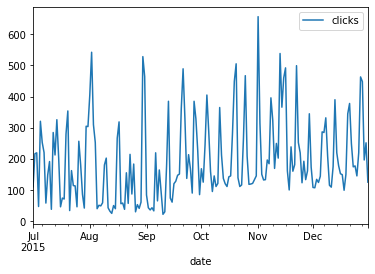

In [32]:
dfa.plot()

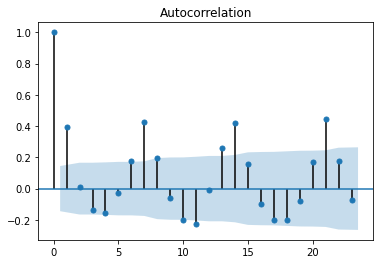

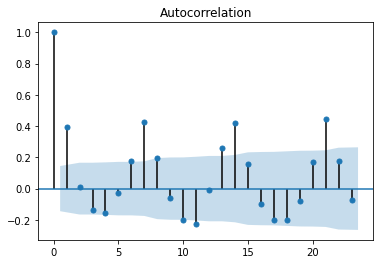

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dfa) 

Since its not stationary, convering it into stationarity 


In [33]:
dfa.shift(1) #differencing 

,clicks
date,
2015-07-01,NaN
2015-07-02,111.0
2015-07-03,217.0
2015-07-04,220.0
2015-07-05,48.0
...,...
2015-12-27,220.0
2015-12-28,463.0
2015-12-29,448.0


In [34]:
dfa_diff = dfa.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [35]:
dfa_diff = dfa_diff[1:] #deleting the first value 
dfa_diff.head()

,clicks
date,
2015-07-02,106.0
2015-07-03,3.0
2015-07-04,-172.0
2015-07-05,273.0
2015-07-06,-68.0


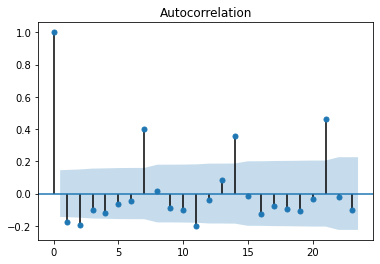

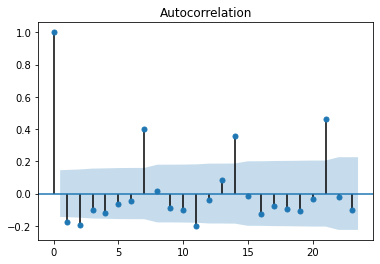

In [38]:
plot_acf(dfa_diff)

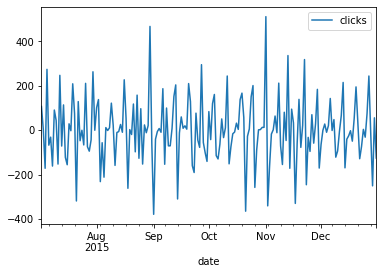

In [39]:
dfa_diff.plot()

In [40]:
#splitting the dataset 
Train1 = dfa.head(n=160)
Test1 = dfa.tail(n=24)

AR model

In [41]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(Train1)
model_ar_fit = model_ar.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [42]:
predictions = model_ar_fit.predict(start=159,end=184)

In [44]:
Test1

,clicks
date,
2015-12-08,332
2015-12-09,210
2015-12-10,116
2015-12-11,110
2015-12-12,176
2015-12-13,390
2015-12-14,220
2015-12-15,179
2015-12-16,153


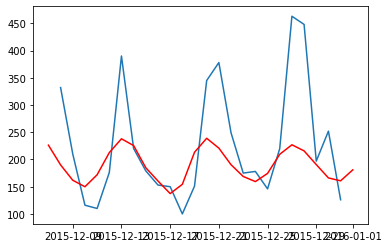

In [45]:
plt.plot(Test1)
plt.plot(predictions,color='red')

# building arima model 

In [46]:
from statsmodels.tsa.arima_model import ARIMA

In [51]:
#p,d,q  p = periods taken for autoregressive model
model_arima1 = ARIMA(Train1,order=(2, 1, 3))
model_arima1_fit = model_arima1.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669

In [52]:
print(model_arima1_fit.aic)
print(model_arima1_fit.bic)
print(model_arima1_fit.llf)

1963.7509405966375
1985.2332700121792
-974.8754702983188


In [58]:
mean_squared_error(Test1,predictions1)

6723.8666116797785

In [53]:
model_arima1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.clicks   No. Observations:                  159
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -974.875
Method:                       css-mle   S.D. of innovations            107.296
Date:                Thu, 14 Jan 2021   AIC                           1963.751
Time:                        06:13:56   BIC                           1985.233
Sample:                    07-02-2015   HQIC                          1972.475
                         - 12-07-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5493      0.191      2.875      0.005       0.175       0.924
ar.L1.D.clicks     1.2360      0.007    184.912      0.000       1.223       1.249
ar.L2.D.clicks    -0.9981      0.004   -251.925      0.000      -1.006      -0.990
ma.L1.D.clicks    -2.2069      0.234     -9.438      0.000      -2.665      -1.749
ma.L2.D.clicks     2.2059      0.615      3.585      0.000       1.000       3.412
ma.L3.D.clicks    -0.9990      0.378     -2.640      0.009      -1.741      -0.257
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6192           -0.7865j            1.0010           -0.1439
AR.2            0.6192           +0.7865j            1.0010            0.1439
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2            0.6040           -0.7976j            1.0005           -0.1468
MA.3            0.6040           +0.7976j            1.0005            0.1468
-----------------------------------------------------------------------------
"""

In [75]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model_arima1_fit.resid) # we see durbin wataon statistics cloose to 1.5, this indicates negative serial corelation

1.5776068464187507

In [55]:
predictions1= model_arima1_fit.forecast(steps=24)[0]
predictions1

array([220.76765013, 144.08066947, 139.62159442, 211.07022772,
       304.24889895, 348.52201459, 310.65983448, 220.09235402,
       146.36123521, 146.04481241, 219.66345267, 311.3894346 ,
       351.70116236, 310.39269743, 219.51952605, 148.85031792,
       152.62348067, 228.24069081, 318.35505574, 354.68007491,
       310.05265501, 219.05644311, 151.54781073, 159.35020405])

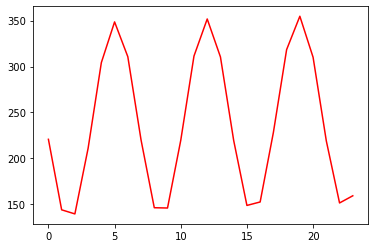

In [56]:
plt.plot(predictions1,color='red')

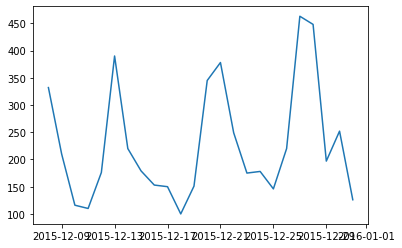

In [57]:
plt.plot(Test1)

Findig the best arima model usng itertools 

In [59]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [60]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(Train1,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.llf)
    except:
        continue    

(0, 0, 0) -1008.6104707538109
(0, 0, 1) -994.393321520948
(0, 0, 2) -993.9808448923413
(0, 0, 3) -993.9363998965348
(0, 0, 4) -993.1474295749831
(0, 1, 0) -1018.3825002744297
(0, 1, 1) -1001.7898866330668
(0, 1, 2) -988.6948142159563
(0, 1, 3) -988.4580753703046
(0, 2, 0) -1081.2946769505852
(0, 2, 1) -1015.010389506774
(1, 0, 0) -995.4876519142133
(1, 0, 1) -994.0654454871377
(1, 0, 2) -993.9741479521155
(1, 0, 4) -993.1272313000954
(1, 1, 0) -1015.2637280135928
(1, 1, 1) -990.1359113527833
(1, 1, 2) -988.5265324879476
(1, 1, 3) -988.4346567517582
(1, 1, 4) -987.5926301055363
(1, 2, 0) -1058.3898562342772
(2, 0, 0) -993.5541067033514
(2, 0, 1) -993.0906100588055
(2, 0, 2) -982.013923039341
(2, 0, 3) -976.5963147918876
(2, 0, 4) -976.5381330477643
(2, 1, 0) -1010.6549604423731
(2, 1, 1) -987.7579239606528
(2, 1, 2) -986.8173275847944
(2, 1, 3) -974.8754702983188
(2, 2, 0) -1045.4454066013996
(3, 0, 0) -993.0923761536311
(3, 0, 1) -992.9809176041606
(3, 0, 2) -976.2406848254727
(3, 1, 0

arima(4,1,4) has the highest llf values

In [61]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(Train1,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 2021.2209415076218
(0, 0, 1) 1994.786643041896
(0, 0, 2) 1995.9616897846827
(0, 0, 3) 1997.8727997930696
(0, 0, 4) 1998.2948591499662
(0, 1, 0) 2040.7650005488595
(0, 1, 1) 2009.5797732661335
(0, 1, 2) 1985.3896284319126
(0, 1, 3) 1986.9161507406093
(0, 2, 0) 2166.5893539011704
(0, 2, 1) 2036.020779013548
(1, 0, 0) 1996.9753038284266
(1, 0, 1) 1996.1308909742754
(1, 0, 2) 1997.948295904231
(1, 0, 4) 2000.254462600191
(1, 1, 0) 2036.5274560271855
(1, 1, 1) 1988.2718227055666
(1, 1, 2) 1987.0530649758953
(1, 1, 3) 1988.8693135035164
(1, 1, 4) 1989.1852602110725
(1, 2, 0) 2122.7797124685544
(2, 0, 0) 1995.1082134067028
(2, 0, 1) 1996.181220117611
(2, 0, 2) 1976.027846078682
(2, 0, 3) 1967.1926295837752
(2, 0, 4) 1969.0762660955286
(2, 1, 0) 2029.3099208847461
(2, 1, 1) 1985.5158479213055
(2, 1, 2) 1985.6346551695888
(2, 1, 3) 1963.7509405966375
(2, 2, 0) 2098.890813202799
(3, 0, 0) 1996.1847523072622
(3, 0, 1) 1997.9618352083212
(3, 0, 2) 1966.4813696509455
(3, 1, 0) 2024.817988

we find the arima model (414) has the lowest aic values , thus we can confirm from here as well ar(4)i(1)ma(4) is the best model

In [62]:
model_arima = ARIMA(Train1,order=(4, 1, 4))
model_arima_fit = model_arima.fit()


1958.6514597348473


In [64]:
model_arima_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 1989.3405 
Dependent Variable: D.clicks         Log-Likelihood:      -969.33   
Date:               2021-01-14 06:21 Scale:               1.0000    
No. Observations:   159              Method:              css-mle   
Df Model:           9                Sample:              07-02-2015
Df Residuals:       150                                   12-07-2015
Converged:          1.0000           S.D. of innovations: 103.875   
No. Iterations:     422.0000         HQIC:                1971.114  
AIC:                1958.6515                                       
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const             0.5465    0.2378   2.2980  0.0229   0.0804   1.0125
ar.L1.D.clicks    0.6166    0.1700   3.6277  0.0004   0.2835   0.9498
ar.L2.D.clicks    0.0048    0.2253   0.0212  0.9831  -0.4368   0.4464
ar.L3.D.clicks   -0.9008    0.2131  -4.2278  0.0000  -1.3183  -0.4832
ar.L4.D.clicks    0.2169    0.1422   1.5251  0.1293  -0.0618   0.4957
ma.L1.D.clicks   -1.3332    0.1381  -9.6563  0.0000  -1.6038  -1.0626
ma.L2.D.clicks    0.1502    0.2497   0.6013  0.5486  -0.3393   0.6396
ma.L3.D.clicks    1.1164    0.2912   3.8340  0.0002   0.5457   1.6870
ma.L4.D.clicks   -0.9322    0.1176  -7.9277  0.0000  -1.1627  -0.7017
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -1.1390            -0.0000           1.1390            -0.5000
AR.2            0.6243            -0.7819           1.0005            -0.1428
AR.3            0.6243             0.7819           1.0005             0.1428
AR.4            4.0429            -0.0000           4.0429            -0.0000
MA.1           -1.0713            -0.0000           1.0713            -0.5000
MA.2            0.6341            -0.7736           1.0003            -0.1407
MA.3            0.6341             0.7736           1.0003             0.1407
MA.4            1.0008            -0.0000           1.0008            -0.0000
====================================================================

"""

In [65]:
from statsmodels.stats.stattools import durbin_watson

In [68]:
durbin_watson(model_arima_fit.resid) # we see durbin wataon statistics cloose to 2, this indicates absence of serial corelation

2.0502325763285962

In [69]:
predictions2= model_arima_fit.forecast(steps=24)[0]
predictions2

array([226.81964993, 158.96255994, 140.65278671, 198.03904649,
       282.42157425, 337.08296433, 316.10962242, 240.4576993 ,
       163.35543061, 146.77963067, 200.36573155, 286.95096553,
       339.38514167, 320.84808821, 243.87941069, 168.46080179,
       150.23929127, 204.53317403, 289.74479629, 343.18293573,
       324.26388288, 248.45526808, 172.5478841 , 154.59238037])

In [70]:
mean_squared_error(Test1,pred)

3486.0583065087753

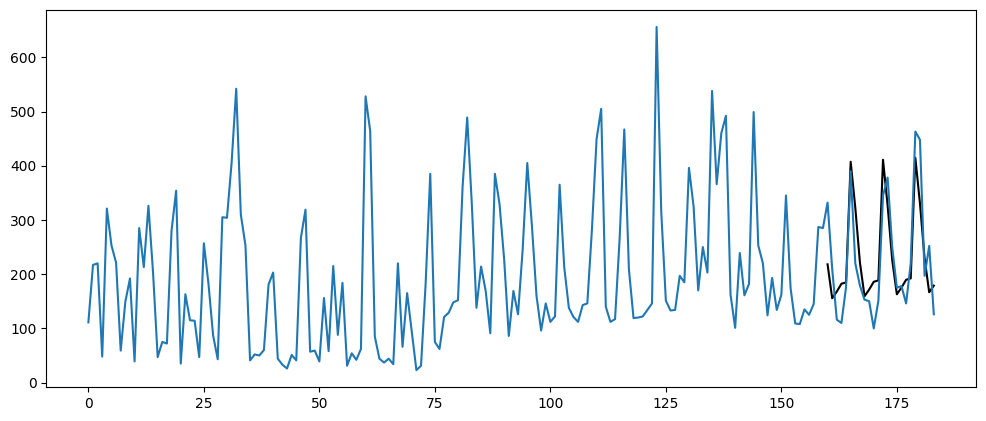

In [71]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(pred,color='black')
plt.plot(df.clicks)


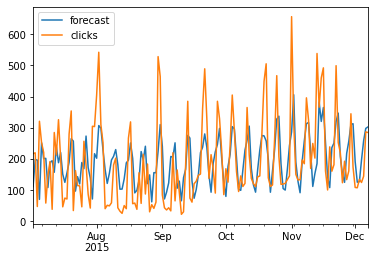

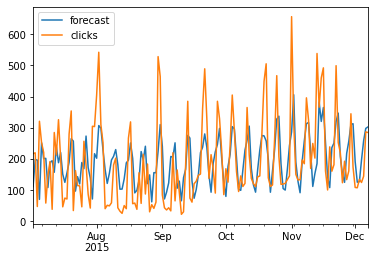

In [72]:
model_arima_fit.plot_predict(dynamic=False) #ARIMA (4,1,4)


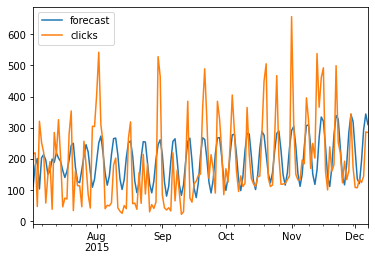

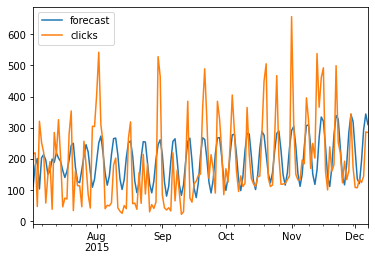

In [73]:
model_arima1_fit.plot_predict(dynamic=False) #ARIMA (2,1,3)


**So we can infer that arima (4,1,4) is the best model with no serial correlation and with good predictive capablities**